<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Bài tập 6: Classification Social_Network_Ads </b></h1>

**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

# Prepare

In [2]:
#Download dữ liệu từ google drive
!gdown --id 1Erg03L0wn8y-c4ZyaJwR38egSODT5ahX

Downloading...
From: https://drive.google.com/uc?id=1Erg03L0wn8y-c4ZyaJwR38egSODT5ahX
To: /content/Social_Network_Ads.csv
100% 4.90k/4.90k [00:00<00:00, 8.98MB/s]


In [3]:
#@title Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

import seaborn as sns
from sklearn import metrics

In [4]:
# Đọc dữ liệu từ file csv
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [107]:
X, y = data.iloc[:,:-1], data['Purchased']

# Analysis Data

<function matplotlib.pyplot.show>

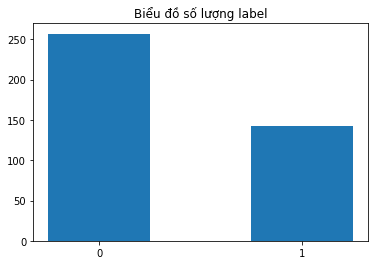

In [5]:
#@title Vẽ biểu đồ 
x = ['0', '1']
y = [data.value_counts('Purchased')[0], data.value_counts('Purchased')[1]]

plt.bar(x, y,  width=0.5,  align='center')
plt.title('Biểu đồ số lượng label')
plt.show 

# Split & Normalize

In [6]:
#Chia dữ liệu thành tập train và tập test theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['Purchased'], test_size=0.2, random_state=42)

In [7]:
#Chuẩn hóa dữ liệu theo tập train
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng một số hàm cần thiết

In [16]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [17]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [46]:
def Visualize(model, X, title):
  X0, X1 = X_train[:, 0], X_train[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plt.figure(figsize=(10, 10))
  plot_contours(plt, model, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

  plt.xlim((xx.min(), xx.max()))
  plt.ylim(yy.min(), yy.max())

  plt.xlabel('Age')
  plt.ylabel('Estimated')
  plt.title(title)
  plt.show()

In [25]:
def plotConfusionMatrix(score, cm):
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15);

#Train

## Logistic Regression

In [179]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

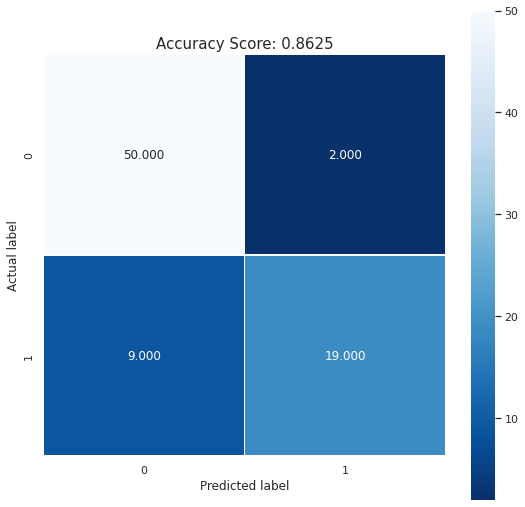

In [180]:
plotConfusionMatrix(model_LR.score(X_test, y_test), metrics.confusion_matrix(y_test, model_LR.predict(X_test)))

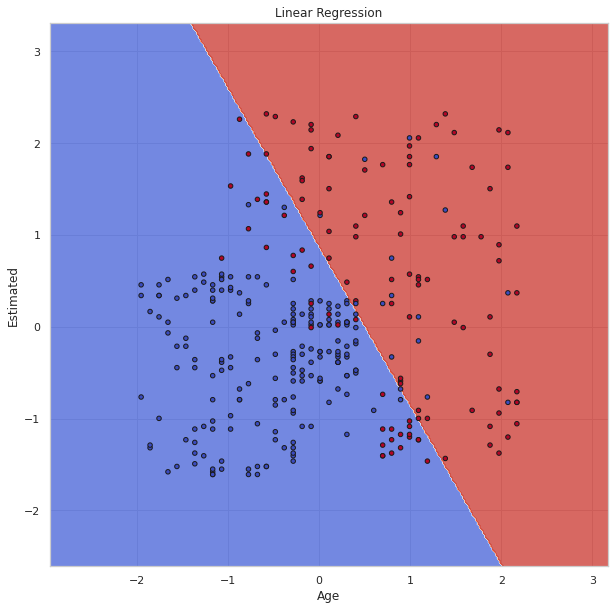

In [181]:
Visualize(model_LR, X_train, 'Linear Regression')

## SVM

In [182]:
model_SVM = svm.SVC()
model_SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

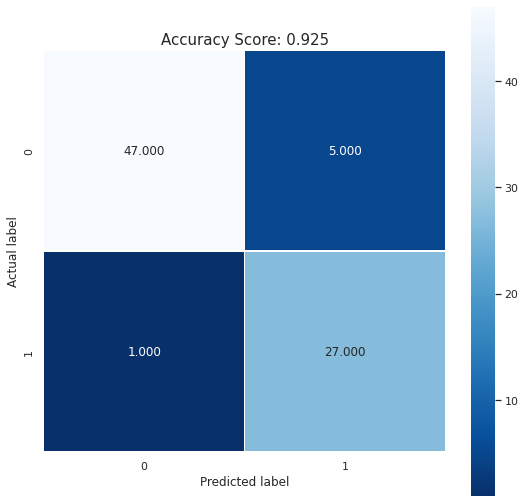

In [183]:
plotConfusionMatrix(model_SVM.score(X_test, y_test), metrics.confusion_matrix(y_test, model_SVM.predict(X_test)))

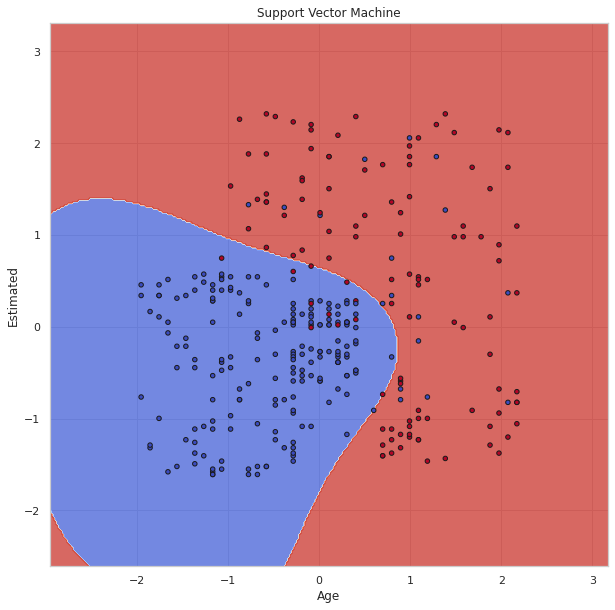

In [184]:
Visualize(model_SVM, X_train, 'Support Vector Machine')

### kernel="rbf"

In [185]:
model_SVM2 = svm.SVC(kernel="rbf")
model_SVM2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

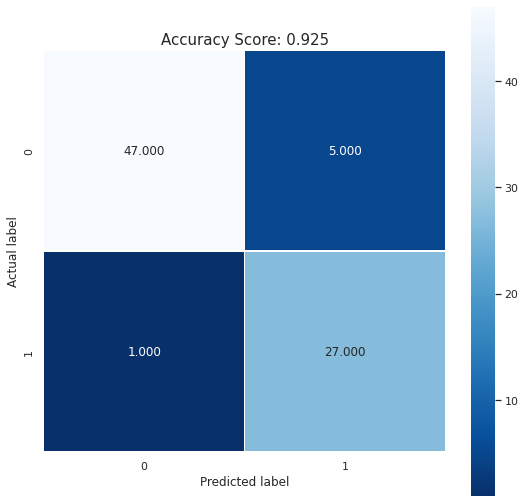

In [186]:
plotConfusionMatrix(model_SVM2.score(X_test, y_test), metrics.confusion_matrix(y_test, model_SVM2.predict(X_test)))

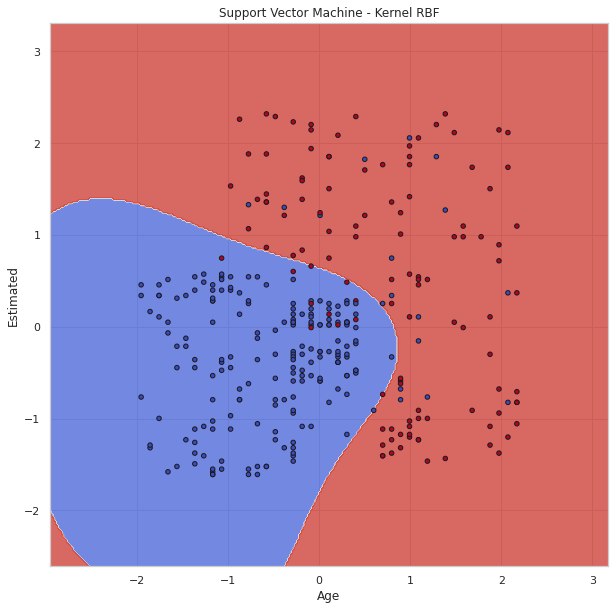

In [187]:
Visualize(model_SVM2, X_train, 'Support Vector Machine - Kernel RBF')

### kernel = 'sigmoid

In [188]:
model_SVM3 = svm.SVC(kernel="sigmoid")
model_SVM3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

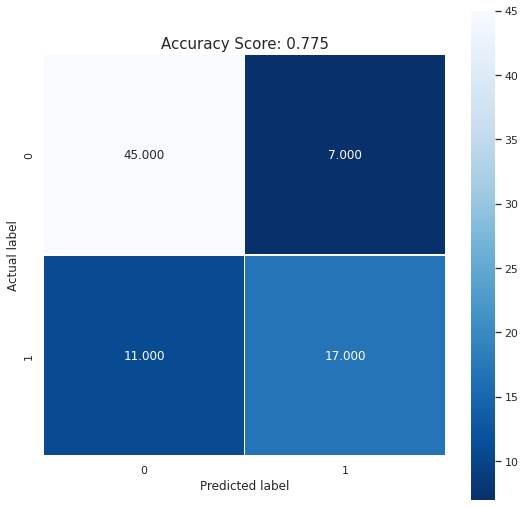

In [189]:
plotConfusionMatrix(model_SVM3.score(X_test, y_test), metrics.confusion_matrix(y_test, model_SVM3.predict(X_test)))

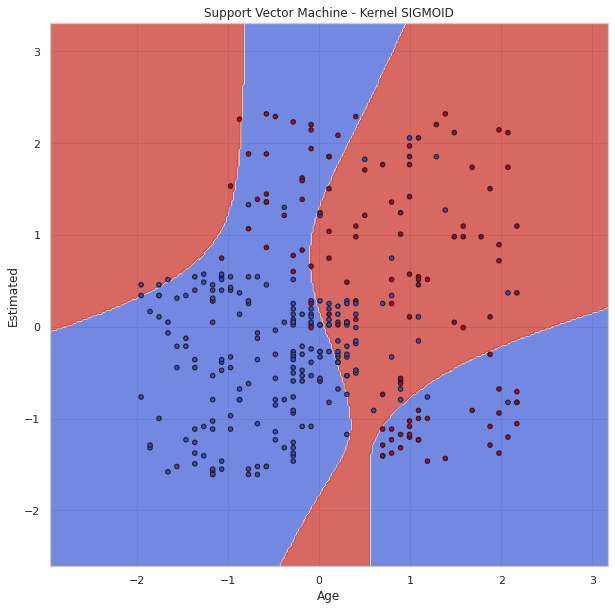

In [190]:
Visualize(model_SVM3, X_train, 'Support Vector Machine - Kernel SIGMOID')

##Naive Bayes

In [191]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

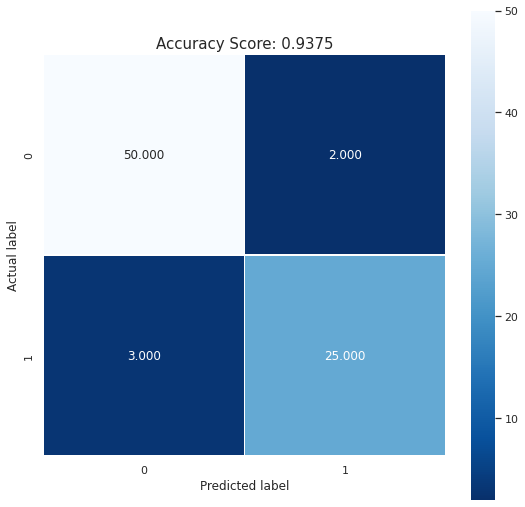

In [192]:
plotConfusionMatrix(model_GNB.score(X_test, y_test), metrics.confusion_matrix(y_test, model_GNB.predict(X_test)))

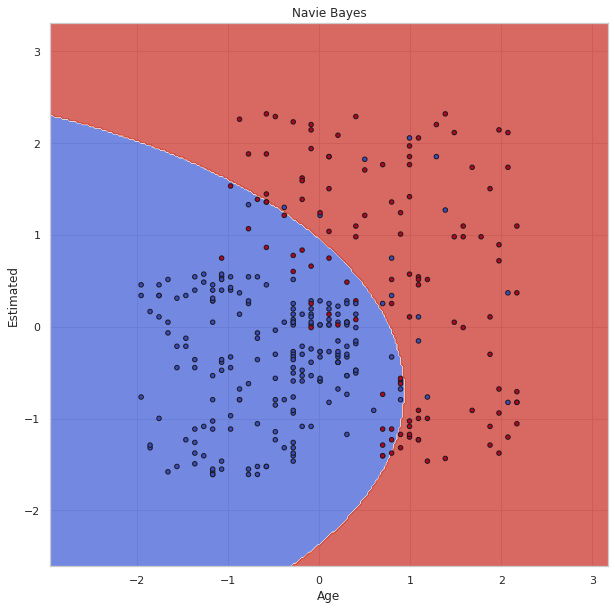

In [193]:
Visualize(model_GNB, X_train, 'Navie Bayes')

## Decision Tree

In [194]:
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

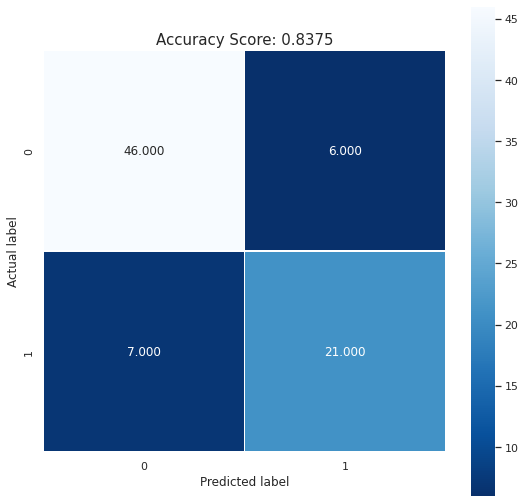

In [195]:
plotConfusionMatrix(model_DT.score(X_test, y_test), metrics.confusion_matrix(y_test, model_DT.predict(X_test)))

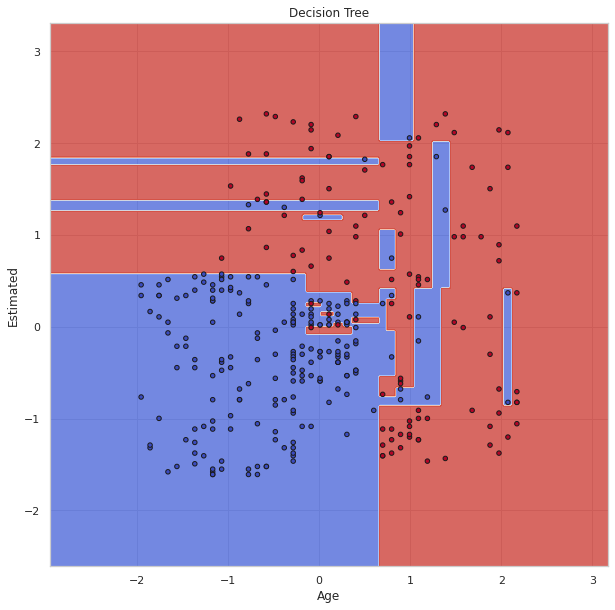

In [196]:
Visualize(model_DT, X_train, 'Decision Tree')

## RandomForest

In [197]:
model_RF=RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

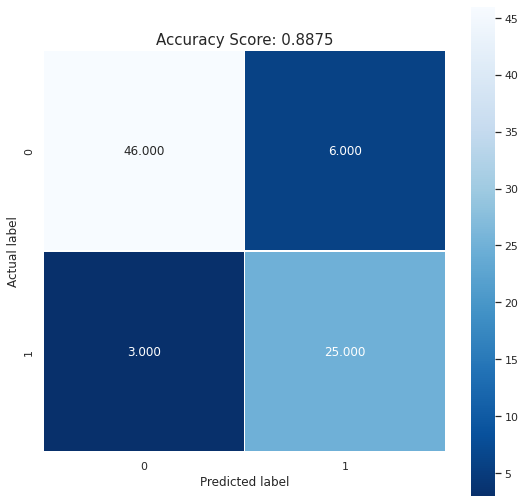

In [198]:
plotConfusionMatrix(model_RF.score(X_test, y_test), metrics.confusion_matrix(y_test, model_RF.predict(X_test)))

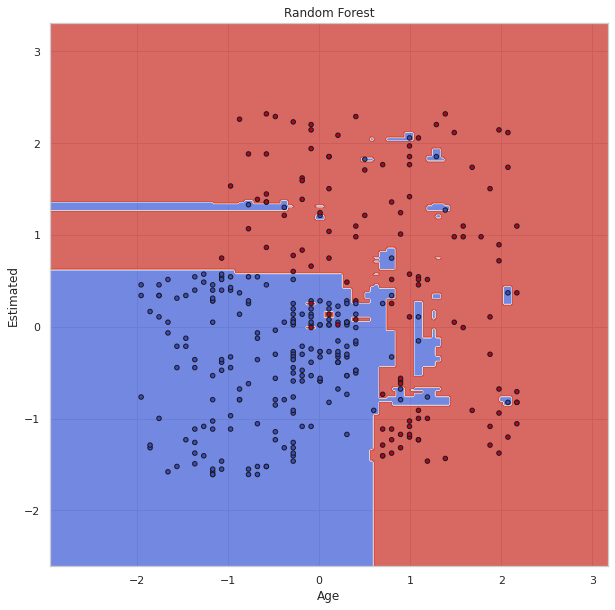

In [199]:
Visualize(model_RF, X_train, 'Random Forest')

## KNN

In [200]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

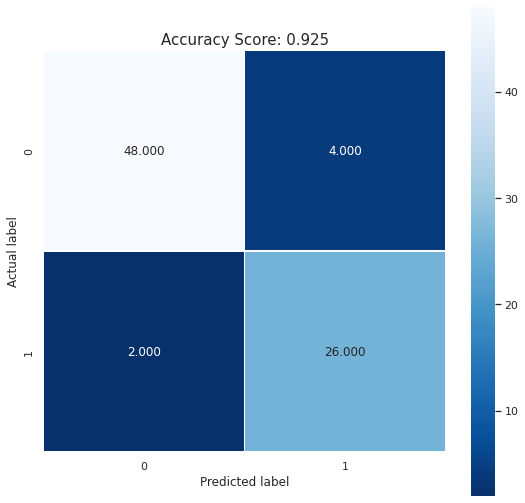

In [201]:
plotConfusionMatrix(neigh.score(X_test, y_test), metrics.confusion_matrix(y_test, neigh.predict(X_test)))

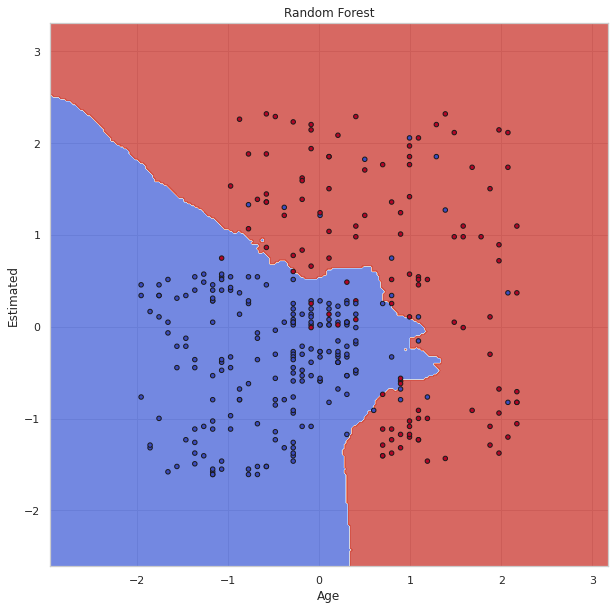

In [202]:
Visualize(neigh, X_train, 'Random Forest')

## Tổng kết:

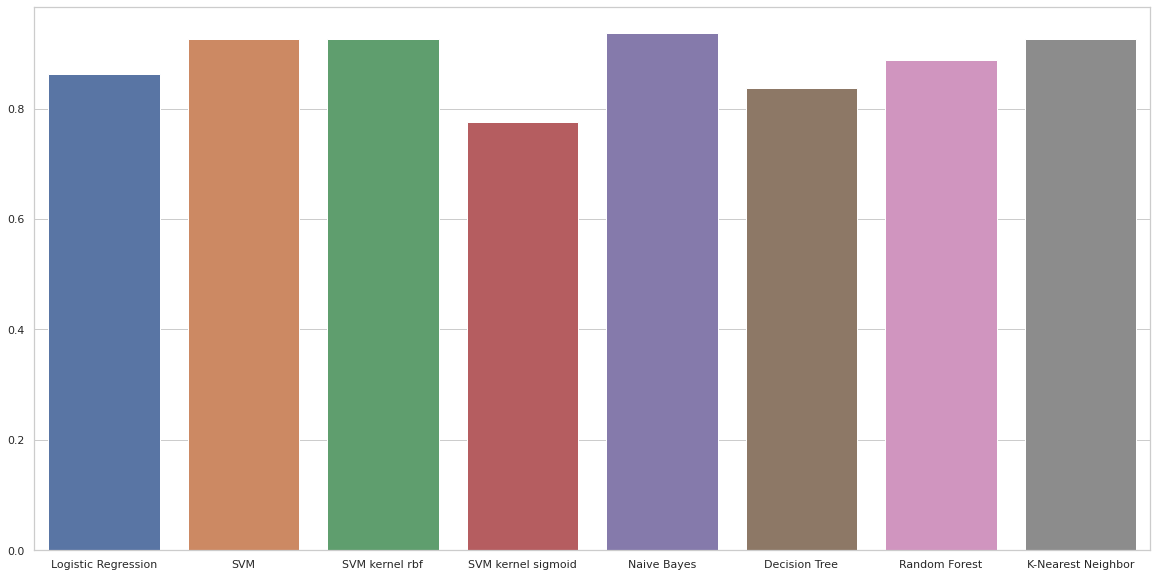

In [203]:
models_tag = ['Logistic Regression', 'SVM',	'SVM kernel rbf', 'SVM kernel sigmoid' ,	'Naive Bayes',	'Decision Tree', 'Random Forest','K-Nearest Neighbor']
models = [model_LR, model_SVM, model_SVM2, model_SVM3, model_GNB, model_DT, model_RF, neigh]
acc_list = []

for idx in models:
  acc_list.append(idx.score(X_test, y_test))

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x= models_tag, y= acc_list)

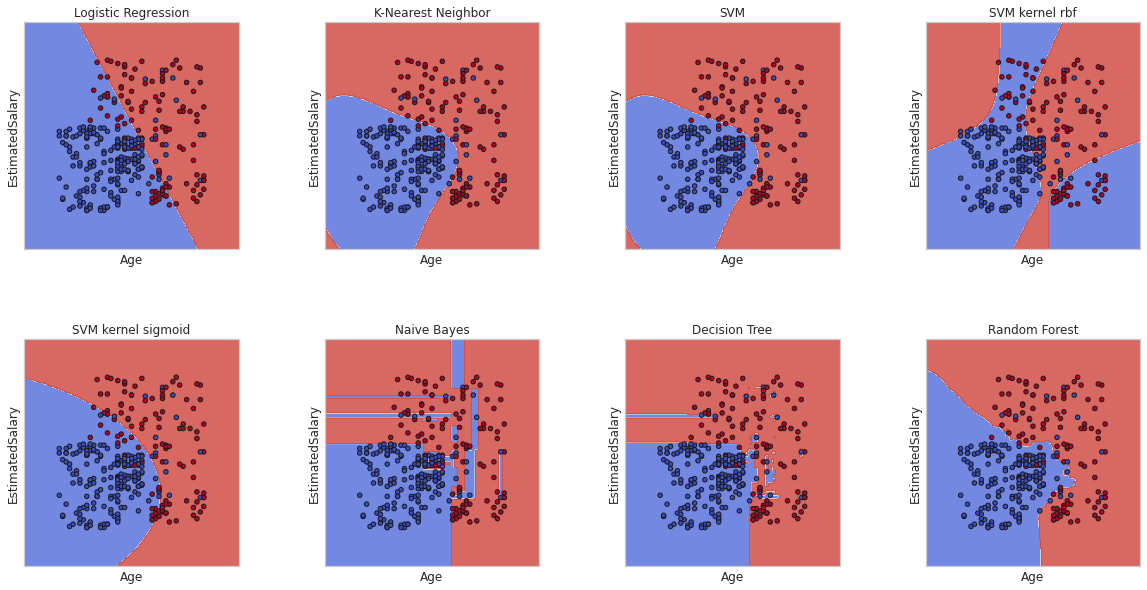

In [204]:
titles =  ('Logistic Regression',	'K-Nearest Neighbor',	'SVM',	'SVM kernel rbf', 'SVM kernel sigmoid' ,	'Naive Bayes',	'Decision Tree', 'Random Forest')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Age')
    ax.set_ylabel('EstimatedSalary')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

#KFOLD

In [102]:
from sklearn.model_selection import cross_val_score

In [124]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [126]:
score_list = []

## Train model

In [163]:
acc_list2, acc_err = [], []

In [164]:
#@title Logistic Regression
model_1 = LogisticRegression()
scores = cross_val_score(model_1, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model Logistic Regression:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model Logistic Regression:
=> Accuracy: 0.8275 (Độ lệch +- 0.10350120772242227)


In [165]:
model_2 = svm.SVC()
scores = cross_val_score(model_2, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model SVM:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model SVM:
=> Accuracy: 0.9025000000000001 (Độ lệch +- 0.042130748865881806)


In [166]:
model_3 = svm.SVC(kernel="rbf")
scores = cross_val_score(model_3, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model SVM kernel rbf:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model SVM kernel rbf:
=> Accuracy: 0.9025000000000001 (Độ lệch +- 0.042130748865881806)


In [167]:
model_4 = svm.SVC(kernel="sigmoid")
scores = cross_val_score(model_4, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model SVM kernel sigmoid:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model SVM kernel sigmoid:
=> Accuracy: 0.7275 (Độ lệch +- 0.0972753822917186)


In [168]:
#@ Navie Bayes
model_5 = model_GNB = GaussianNB()
scores = cross_val_score(model_5, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model Naive Bayes:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model Naive Bayes:
=> Accuracy: 0.8850000000000001 (Độ lệch +- 0.05777110004145673)


In [169]:
#@title Decision Tree
model_6 = tree.DecisionTreeClassifier()
scores = cross_val_score(model_6, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model Decision Tree:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model Decision Tree:
=> Accuracy: 0.805 (Độ lệch +- 0.05947688626685159)


In [170]:
#@title Random Forest
model_7 = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(model_7, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model Random Forest:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model Random Forest:
=> Accuracy: 0.8550000000000001 (Độ lệch +- 0.05396758286230725)


In [171]:
#@title KNN
model_8 = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model_8, X, y, cv=5)
acc_list2.append(np.mean(scores))
acc_err.append(np.std(scores))
print('Đánh giá tổng thể các folds model KNN:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model KNN:
=> Accuracy: 0.8899999999999999 (Độ lệch +- 0.037416573867739424)


## Tổng kết KFOLD:

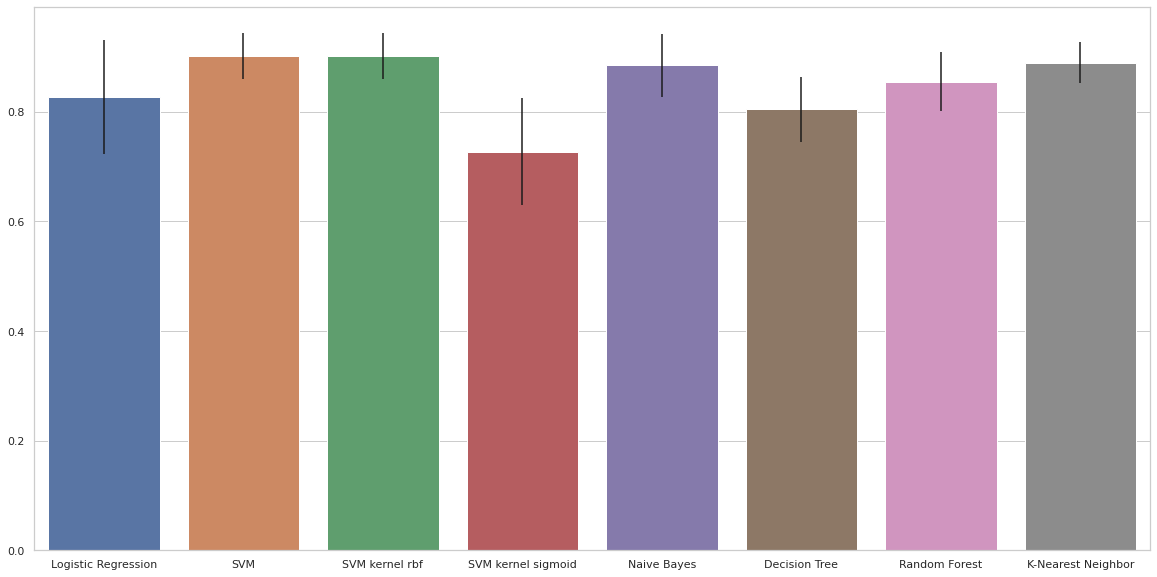

In [178]:
models_tag = ['Logistic Regression', 'SVM',	'SVM kernel rbf', 'SVM kernel sigmoid' ,	'Naive Bayes',	'Decision Tree', 'Random Forest','K-Nearest Neighbor']

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x= models_tag, y= acc_list2, yerr=acc_err)